## PART 5: Python/Pandas Implementation



### Task 5.1: Database Connection
Write Python code to connect to the PostgreSQL database using `psycopg2` or `SQLAlchemy`.

In [65]:
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# 
USER ='postgres'
PASSWORD = 'kanyisola'
HOST = 'localhost'
PORT = '5432'
DB = 'library_db'

# Create database connection
engine = create_engine(f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}')

# Load all the database
books = pd.read_sql("SELECT * FROM Books", engine)
authors = pd.read_sql("SELECT * FROM Authors", engine)
book_orders = pd.read_sql("SELECT * FROM BookOrders", engine)
borrow_history = pd.read_sql("SELECT * FROM Borrowedhistory", engine)
members = pd.read_sql("SELECT * FROM Members", engine)
library_staff = pd.read_sql("SELECT * FROM LibraryStaff", engine)
departments = pd.read_sql("SELECT * FROM Departments", engine)

# Display the book_orders
book_orders.head()

,order_id,order_date,book_id,cost,quantity,supply_date,fulfillment_status,supplier_name
0,1,2024-01-10,1,12.99,5,2024-01-18,fulfilled,Baker & Taylor
1,2,2024-01-15,22,15.95,8,2024-01-25,fulfilled,Ingram Book Group
2,3,2024-02-05,30,8.99,10,2024-02-15,fulfilled,Scholastic
3,4,2024-02-12,7,14.50,6,2024-02-22,fulfilled,Random House
4,5,2024-02-20,19,13.75,4,2024-03-02,fulfilled,HarperCollins


### Task 5.2: Query Translation
Translate the following SQL queries into Pandas equivalents:

1. Query from Q3 (Book count per author)
2. Query from Q7 (Top 5 most borrowed books)
3. Query from Q9 (Average available copies per genre)
4. Query from Q12 (Monthly borrowing trends)
5. One advanced query of your choice from Q11-Q15

**Q3.** Display the total number of books written by each author, ordered by count (descending).

In [66]:
# Print the author's columns
authors.columns

Index(['authors_id', 'author_name', 'country_of_origin',
       'number_of_books_written'],
      dtype='object')

In [67]:
# Displaying the number of books written by each author
authors_by_books = authors.groupby('author_name')['number_of_books_written'].sum().sort_values(ascending=False)
authors_by_books

author_name
Isaac Asimov                500
Agatha Christie              85
Stephen King                 64
Philip K. Dick               44
Terry Pratchett              41
Neil Gaiman                  35
Arthur C. Clarke             33
Paulo Coelho                 30
Brandon Sanderson            28
Ray Bradbury                 27
Bill Bryson                  25
Isabel Allende               25
Margaret Atwood              23
Robin Hobb                   22
Ursula K. Le Guin            21
Salman Rushdie               19
Haruki Murakami              18
George R.R. Martin           15
Gabriel García Márquez       15
J.K. Rowling                 14
Kurt Vonnegut                14
Elena Ferrante               12
Douglas Adams                12
Octavio Paz                  12
Toni Morrison                11
Kazuo Ishiguro               10
Umberto Eco                   9
Colson Whitehead              9
Milan Kundera                 8
Mary Roach                    8
Ayn Rand                    

In [68]:
# Displaying the total number of books written by each author, ordered by count (descending)
total_no_books_written = authors[['authors_id', 'author_name', 'number_of_books_written']]
total_no_books_written_table = total_no_books_written.sort_values(by='number_of_books_written', ascending=False)
total_no_books_written_table


,authors_id,author_name,number_of_books_written
43,44,Isaac Asimov,500
10,11,Agatha Christie,85
8,9,Stephen King,64
44,45,Philip K. Dick,44
37,38,Terry Pratchett,41
36,37,Neil Gaiman,35
45,46,Arthur C. Clarke,33
11,12,Paulo Coelho,30
39,40,Brandon Sanderson,28
46,47,Ray Bradbury,27


**Q7. Find the top 5 most borrowed books along with the number of times each has been borrowed**

In [69]:
# print the columns in borrow_history
borrow_history.columns

Index(['borrowed_id', 'book_id', 'membership_id', 'borrow_date',
       'return_date'],
      dtype='object')

In [70]:
# print the columns in books
books.columns

Index(['book_id', 'title', 'authors_id', 'genre', 'date_of_publication',
       'publisher', 'isbn', 'language', 'available_copies', 'age_rating'],
      dtype='object')

In [71]:
# convert the date to date time
borrow_history['borrow_date'] = pd.to_datetime(borrow_history['borrow_date'])

In [72]:
# Merge the borrow_history and books by the primary key
books_borrowed = pd.merge(books, borrow_history, on='book_id', how='inner')
books_borrowed

,book_id,title,authors_id,genre,date_of_publication,publisher,isbn,language,available_copies,age_rating,borrowed_id,membership_id,borrow_date,return_date
0,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,1,1,2024-01-15,2024-02-05
1,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,55,50,2024-03-22,None
2,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,144,64,2024-03-28,None
3,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,2,3,2024-02-10,2024-03-02
4,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,60,55,2024-03-28,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,98,The Colour of Magic,38,Fantasy,1983-11-01,Colin Smythe,9780552124751,English,2,14+,128,48,2024-02-18,2024-03-10
146,99,Mort,38,Fantasy,1987-11-01,Gollancz,9780552131063,English,3,14+,50,45,2024-03-30,None
147,99,Mort,38,Fantasy,1987-11-01,Gollancz,9780552131063,English,3,14+,134,54,2024-03-30,None
148,100,A Game of Thrones,39,Fantasy,1996-08-01,Bantam Spectra,9780553103540,English,4,18+,21,16,2024-03-18,None


In [73]:
# Top 5 most borrowed books along with the number of times each has been borrowed.
top_5_books = books_borrowed.groupby(['book_id','title']).size().reset_index(name='times_borrowed').sort_values(by='times_borrowed', ascending=False).head(5)
top_5_books

,book_id,title,times_borrowed
0,1,The Handmaid's Tale,3
1,2,Cat's Eye,3
29,30,Harry Potter and the Philosopher's Stone,3
3,4,Norwegian Wood,2
25,26,It,2


**Q9. Show the average number of available copies per genre.**

In [74]:
# Print the columns in books
books.columns

Index(['book_id', 'title', 'authors_id', 'genre', 'date_of_publication',
       'publisher', 'isbn', 'language', 'available_copies', 'age_rating'],
      dtype='object')

In [87]:
# Showing the average no of available copies by genre
avg_available_copies = books.groupby('genre')['available_copies'].mean().reset_index(name='available_copies').sort_values(by='available_copies', ascending=True)
round(avg_available_copies, 2)

,genre,available_copies
2,Essay,1.00
8,Magical Realism,1.75
7,Literary Fiction,1.81
5,Historical Mystery,2.00
12,Philosophical Fiction,2.00
13,Post-apocalyptic,2.00
0,Children's Literature,2.00
4,Historical Fiction,2.33
6,Horror,2.50
15,Science,2.50


**Q12. Generate a report showing monthly borrowing trends for the past year (count of books borrowed per month).**

In [76]:
# Print the columns in borrow_history
borrow_history.columns

Index(['borrowed_id', 'book_id', 'membership_id', 'borrow_date',
       'return_date'],
      dtype='object')

In [77]:
# Check the type of the data
borrow_history.dtypes

borrowed_id               int64
book_id                   int64
membership_id             int64
borrow_date      datetime64[ns]
return_date              object
dtype: object

In [78]:
# convert the borrow_date to datetime format
books_borrowed['borrow_date'] = pd.to_datetime(books_borrowed['borrow_date'])

# Extract the year and month from the date
books_borrowed['borrow_year'] = books_borrowed['borrow_date'].dt.year
books_borrowed['borrow_month'] = books_borrowed['borrow_date'].dt.month_name()

In [79]:
# Display the new columns
borrow_history.head(2)

,borrowed_id,book_id,membership_id,borrow_date,return_date
0,1,1,1,2024-01-15,2024-02-05
1,2,2,3,2024-02-10,2024-03-02


In [80]:
# Monthly borrowing trends for the past year (count of books borrowed per month).
borrowed_books_trend = books_borrowed.groupby(['borrow_year', 'borrow_month']).size().reset_index(name='total_borrowed_books').sort_values(by='total_borrowed_books', ascending=True)
borrowed_books_trend

,borrow_year,borrow_month,total_borrowed_books
1,2024,January,32
0,2024,February,58
2,2024,March,60


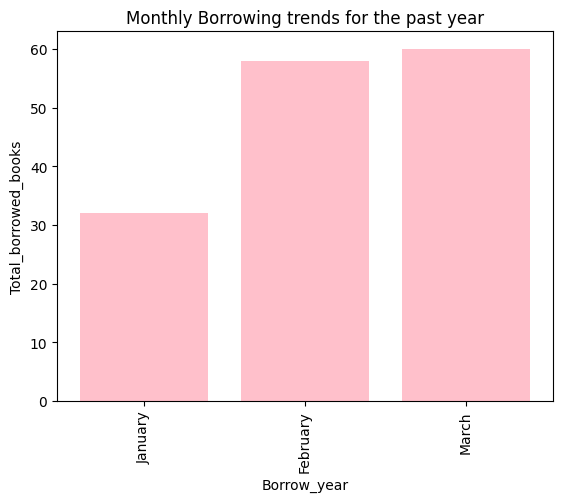

In [81]:
# Plotting the monthly borrowing trends for the year 2024 using barchart in pandas
plt.bar(borrowed_books_trend['borrow_month'], borrowed_books_trend['total_borrowed_books'], color='pink')
plt.xlabel('Borrow_year')
plt.ylabel('Total_borrowed_books')
plt.title('Monthly Borrowing trends for the past year')
plt.xticks(rotation=90)
plt.show()


**Q14. Calculate the total revenue from book orders per supplier, showing only suppliers with orders exceeding $5,000.**


In [82]:
# Print the columns in bookorders
book_orders.columns

Index(['order_id', 'order_date', 'book_id', 'cost', 'quantity', 'supply_date',
       'fulfillment_status', 'supplier_name'],
      dtype='object')

In [83]:
# Calculating the total revenue
book_orders['total_revenue'] = (book_orders['cost'] * book_orders['quantity'])
book_orders['total_revenue'] 

0      64.95
1     127.60
2      89.90
3      87.00
4      55.00
       ...  
75     68.25
76     89.94
77    119.25
78     58.75
79    103.96
Name: total_revenue, Length: 80, dtype: float64

In [84]:
# Display the table 
book_orders.head()

,order_id,order_date,book_id,cost,quantity,supply_date,fulfillment_status,supplier_name,total_revenue
0,1,2024-01-10,1,12.99,5,2024-01-18,fulfilled,Baker & Taylor,64.95
1,2,2024-01-15,22,15.95,8,2024-01-25,fulfilled,Ingram Book Group,127.60
2,3,2024-02-05,30,8.99,10,2024-02-15,fulfilled,Scholastic,89.90
3,4,2024-02-12,7,14.50,6,2024-02-22,fulfilled,Random House,87.00
4,5,2024-02-20,19,13.75,4,2024-03-02,fulfilled,HarperCollins,55.00


In [85]:
# Checking for the total revenue from book orders per supplier, showing only suppliers with orders exceeding $5,000.
book_orders_5000usd = book_orders[(book_orders['total_revenue'] > 5000) & (book_orders['supplier_name'])]
book_orders_5000usd.head(2)

,order_id,order_date,book_id,cost,quantity,supply_date,fulfillment_status,supplier_name,total_revenue


In [86]:
# Displaying only the suppliers with orders exceeding $5,000. (descending)
supply_book_orders = book_orders_5000usd[['supplier_name', 'total_revenue']]
supply_book_orders_table = supply_book_orders.sort_values(by='total_revenue', ascending=False)
supply_book_orders_table

,supplier_name,total_revenue
